## Создание сети через класс в Python

Создадим простейший класс в Питоне. Затем инициализирцем новый объект класса и сохраним в локальную переменную `c`

In [1]:
class Example:
    
  "A basic example class that returns a function object"
  def b(self):
    return "this is an example class"

c = Example()

Все атрибуты или поля класса удобно задавать через специальную функцию, называемую конструктор `__init__`. Все атрибуты класса должны начинаться с `self.<name>`. Удобство использования атрибутов в классе заключается в том, что атрибуты видны в любом месте внутри класса. Так, `self.length` и `self.width` создаются в конструкторе, а используются в функции `area`

In [2]:
class Square:

   def __init__(self, length, width):
       self.length = length
       self.width = width

   def area(self):
       return self.width * self.length

       
r = Square(20, 2000)
print("Rectangle Area: %d" % (r.area()))

Rectangle Area: 40000


Конечно, основная причина использования классов в Python заключается в том, что это позволяет создавать объекты кастомных типов. Например, задать точку в пространстве, указав ее координаты, создать объект животное со всеми описаниями конкретного вида и возможностями, присущими только ему и др.

Ниже мы создаем несколько объектов класса "Собака". Каждый объект обладает собсвтенной породой и окрасом

In [4]:
class Dog:
   
    # Class Variable
    animal = 'dog'            
   
    # The init method or constructor
    def __init__(self, breed, color):
     
        # Instance Variable    
        self.breed = breed
        self.color = color
    
# Objects of Dog class
Rodger = Dog("Pug", "brown")
Buzo = Dog("Bulldog", "black")
 
print('Rodger details:')  
print('Rodger is a', Rodger.animal)
print('Breed: ', Rodger.breed)
print('Color: ', Rodger.color)
 
print('\nBuzo details:')  
print('Buzo is a', Buzo.animal)
print('Breed: ', Buzo.breed)
print('Color: ', Buzo.color)
 
# Class variables can be accessed using class name also
print("\nAccessing class variable using class name")
print(Dog.animal)  

Rodger details:
Rodger is a dog
Breed:  Pug
Color:  brown

Buzo details:
Buzo is a dog
Breed:  Bulldog
Color:  black

Accessing class variable using class name
dog


In [5]:
class Dog:
       
    # Class Variable
    animal = 'dog'     
       
    # The init method or constructor
    def __init__(self, breed):
           
        # Instance Variable
        self.breed = breed            
   
    # Adds an instance variable 
    def setColor(self, color):
        self.color = color
       
    # Retrieves instance variable    
    def getColor(self):    
        return self.color   
   
Rodger = Dog("pug")
Rodger.setColor("brown")
print(Rodger.getColor()) 

brown


[Источник](https://www.geeksforgeeks.org/python-classes-and-objects/) некоторых фрагментов кода

### Наследование классов в Питоне

Наследование позволяет определить класс, который использует все поля и методы другого (базового или родительского) класса. Это ускоряет и упрощает процесс разработки. Нет необходимости каждый раз переписывать стнадартные операции. Очевидная аналогия - использование встроенных в Питон функций типа `sum` или `mean`. \

Терминология: 
- Parent class - класс, от которого другой класс наследует поля и методы
- Child class - класс, который наследует поля и методы родительского класса

Любой класс в Питоне может быть ролительским, поэтому создание родительского класса ничем не отличается от создание обычного класса, т.е. от уже привычного нам способа

In [10]:
class Person:

  def __init__(self, fname, lname):
    self.firstname = fname
    self.lastname = lname

  def printname(self):
    print(self.firstname, self.lastname)

#Use the Person class to create an object, and then execute the printname method:
x = Person("John", "Doe")
x.printname()

John Doe


Чтобы создать child class нужно передать в качестве парметра классу название родительского класса.

Теперь класс `Student` обладает всеми методами и полями, что были у класса `Person`

In [11]:
class Student(Person):
    pass

x = Student("Mike", "Olsen")
x.printname()

Mike Olsen


В большинстве случаев мы не просто хотим использовать функционал родительского класса под новым названием, скорее мы хотим расширить этот функционал новыми методами, тем самым дав большую специализацию выбранному классу. Например, перейти от человека к студенту.

Мы можем переопределять методы родительского класса для их использования в child классе. Если мы в child классе создали метод с идентичным названием методу из родительского класса, то метод функционал метода из родительского класса будет утрачен и изменен на вновь созданный функционал

In [8]:
class Student(Person):
    def __init__(self, fname, lname):
        #add properties etc.

SyntaxError: ignored

Тем не менее, бывает, что мы хотим сохранить возможности родительского метода и добавить кое-что от себя в этот же метод. В таком случае можно переопределить уже существующий метод, но внутри него вызвать метод родительского класса

In [9]:
class Student(Person):
    def __init__(self, fname, lname):
        Person.__init__(self, fname, lname)
        #add properties etc.

#### super() функция
В Питоне есть функция super(), которая позволяет унаследовать и "заимпортировать" все методы и поля родительского класса. Ее нужно вызываьт внутри конструктора `__init__`

In [ ]:
class Student(Person):
    def __init__(self, fname, lname):
        super().__init__(fname, lname)

Устаревшая форма записи функции super() через подачу в нее аргументов - название создаваемого класса и ключевое слово `self`. 

In [12]:
class Student(Person):
    def __init__(self, fname, lname):
        super(Student, self).__init__(fname, lname)

Рассмотрим ниже пример использования функции `super()`. Здесь мы использовали констурктор родительского класса `Person`. Дополнили его полем `self.graduationyear`, а затем добавили новый метод `welcome()`

In [13]:
class Student(Person):
    def __init__(self, fname, lname, year):
        super().__init__(fname, lname) # иначе при потпытке вызова st.printname() будет AttributeError: 'Student' object has no attribute 'firstname'
        self.graduationyear = year

    def welcome(self):
        print("Welcome", self.firstname, self.lastname, "to the class of", self.graduationyear)

In [14]:
pers = Person("Mike", "Olsen")
pers.printname()

Mike Olsen


In [15]:
st = Student("Mike", "Olsen", 2021)
st.printname()
st.welcome()

Mike Olsen
Welcome Mike Olsen to the class of 2021


 ## Создание нейронной сети через класс

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/HSE_DL_2021/04_week

/content/gdrive/My Drive/HSE_DL_2021/04_week


### Архитектура сети

Раньше мы задавали архитектуру сети, используя последовательной способ объявления слоев сети `nn.Sequential`, задавая его внутри функции `build_model`

Но еще можно это сделать более гибким методом:

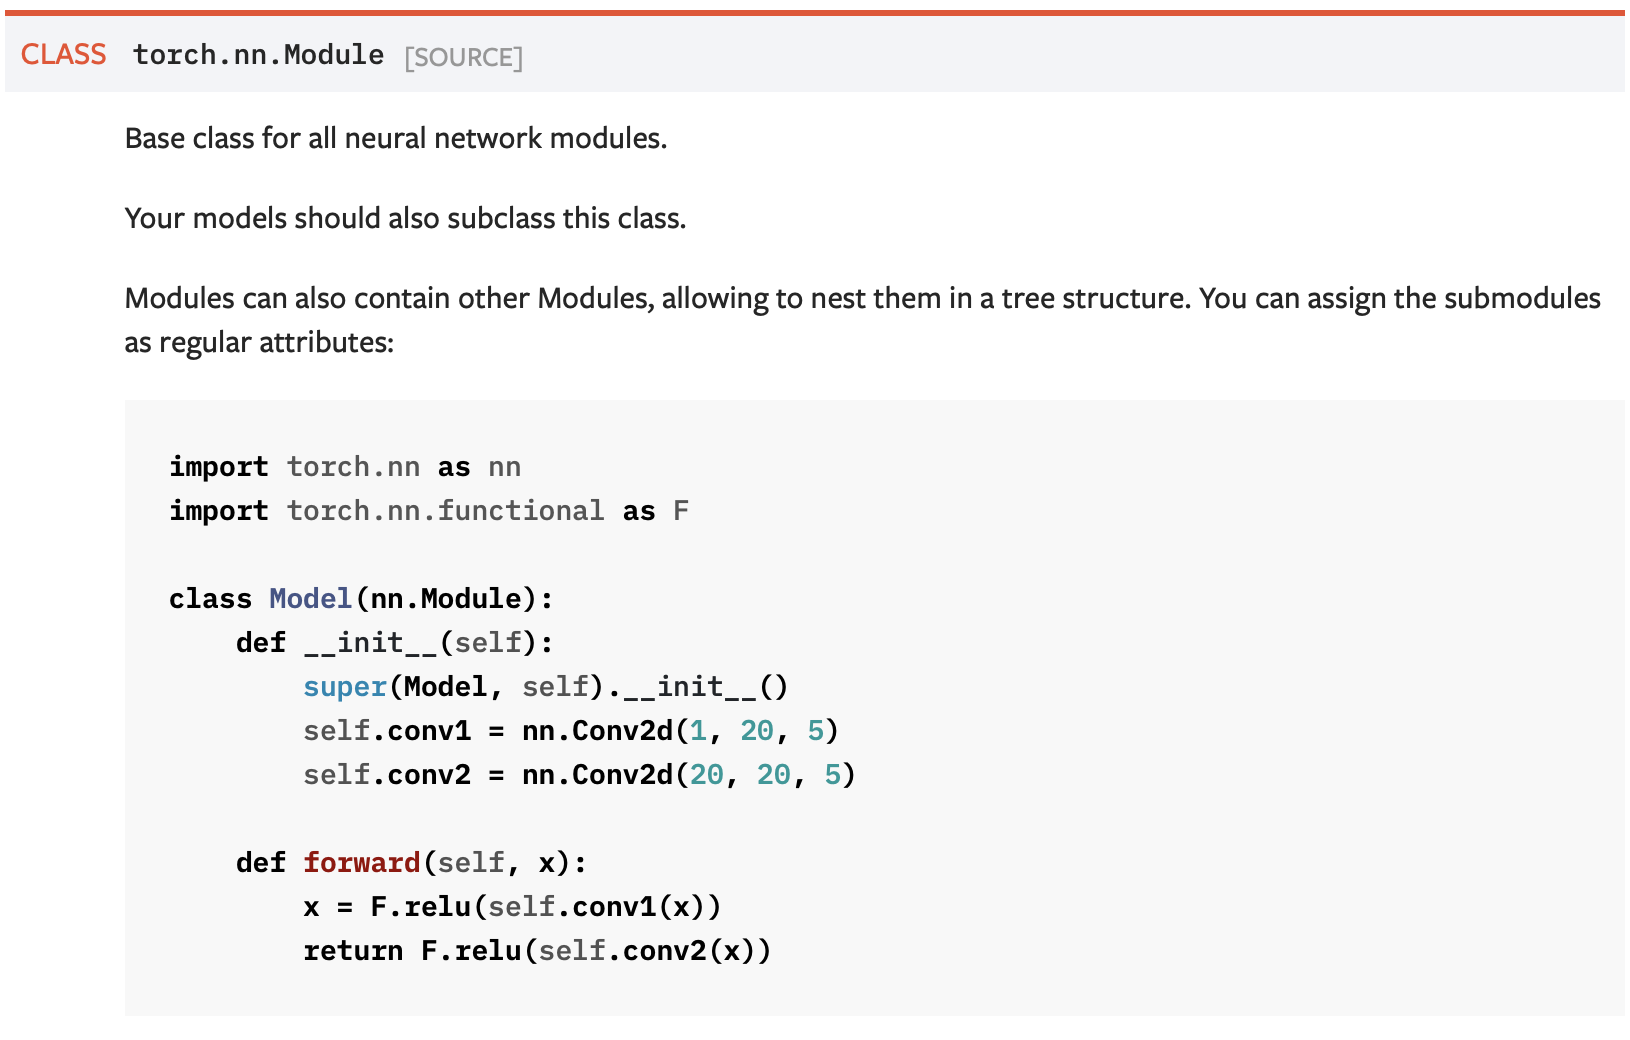

In [ ]:
from IPython import display
display.Image('images/nn_module.png')

In [16]:
import torch
from torch import nn

class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        TwoLayerNet наследуется от nn.Module и тем самым полчаем возможность
        переопределять методы класса.
        В конструктуре создаем слои (обучаемые веса) и другие нужные перменные/функции,
        которые нужны для модели
        """
        super(TwoLayerNet, self).__init__() # super().__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        Метод forward отвечает за прямое распростронение модели, 
        поэтому данный метод нужно переопределять обязательно, 
        чтобы задать логику прямого распростронения. 
        Именно в этот момент начинает строится динамический граф
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        
        return y_pred

In [18]:
batch_size = 64
input_size = 1000
hidden_size = 100
output_size = 10

device = torch.device('cuda: 0' if torch.cuda.is_available() else 'cpu')

x = torch.randn(batch_size, input_size, device=device)
y = torch.randn(batch_size, output_size, device=device)

model = TwoLayerNet(input_size, hidden_size, output_size)

loss_fn = torch.nn.MSELoss(reduction='sum')
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)


for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

99 45.89966583251953
199 0.5168720483779907
299 0.003704201662912965
399 9.478463471168652e-05
499 5.37878349859966e-06
